In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.autograd import Variable
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split, TensorDataset

import pytorch_lightning as pl

from GetData import SinData
from BaseModel import BaseModel

In [5]:
class Model(BaseModel):
    def __init__(self, *args, **kwargs):
        super().__init__(F.mse_loss, **kwargs)
        self.fc = nn.Linear(200, 1)
        
    def forward(self, X):
        return self.fc(X)
    
    def test_epoch_end(self, outputs):
        h, y = zip(*outputs)
        h = torch.flatten(torch.cat(h, 0)).cpu().numpy()
        y = torch.flatten(torch.cat(y, 0)).cpu().numpy()
        plt.scatter(y, h)
        plt.show()

In [6]:
data_module = SinData(200, batch_size=32)
model = Model()
trainer = pl.Trainer(max_epochs=100)

GPU available: True, used: False
TPU available: None, using: 0 TPU cores
C:\Users\SAMSUNG\Anaconda3\lib\site-packages\pytorch_lightning\utilities\distributed.py:49: UserWarning: GPU available but not used. Set the --gpus flag when calling the script.
  warnings.warn(*args, **kwargs)


In [7]:
trainer.fit(model, datamodule=data_module)


  | Name | Type   | Params
--------------------------------
0 | fc   | Linear | 201   
--------------------------------
201       Trainable params
0         Non-trainable params
201       Total params


1

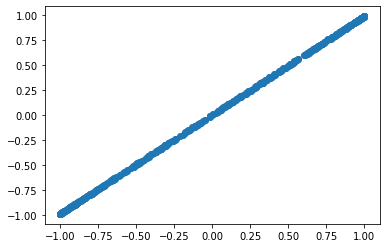


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'loss/test': tensor(4.5918e-05)}
--------------------------------------------------------------------------------


[{'loss/test': 4.591757897287607e-05}]

In [8]:
trainer.test(datamodule=data_module)